In [57]:
# importing the usual things
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import json
import random

# importing visual and 3D data packages
import cv2
import open3d as o3d

# importing geoprocessing packages
from pymap3d import enu2geodetic
import gdal, osr

# importing useful opensfm functions
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/home/ragarcia/OpenSfM/')
from opensfm.features import denormalized_image_coordinates

## Running the reconstruction
Switching here to command line

In [2]:
# General prerequisites for doing reconstruction
!opensfm extract_metadata projects/mercedita

!opensfm detect_features projects/mercedita

!opensfm match_features projects/mercedita

2020-08-20 11:57:16,474 INFO: Extracting EXIF for DSC_0013_0ff205ae-e44f-4e64-93ef-9486c9bd0af6.jpg
2020-08-20 11:57:16,555 INFO: Extracting EXIF for DSC_0009_86d6a9c1-bf1f-4a60-bd78-0314108ad8de.jpg
2020-08-20 11:57:16,633 INFO: Extracting EXIF for DSC_0024_9c2f518f-be72-4cfb-94f3-3b703c50339d.jpg
2020-08-20 11:57:16,708 INFO: Extracting EXIF for DSC_0003_43058503-bac4-4655-971b-66374c69d2a7.jpg
2020-08-20 11:57:16,790 INFO: Extracting EXIF for DSC_0025_75937cbe-1197-4b32-85c6-01888538517c.jpg
2020-08-20 11:57:16,867 INFO: Extracting EXIF for DSC_0010_3ef2666f-35ae-4ed9-a3f2-e9cebaa96921.jpg
2020-08-20 11:57:16,947 INFO: Extracting EXIF for DSC_0028_ecb7bab7-d7bd-4e03-b424-2aa624531942.jpg
2020-08-20 11:57:17,023 INFO: Extracting EXIF for DSC_0006_c4295777-fab7-43be-8f1a-2b1c402d0b40.jpg
2020-08-20 11:57:17,100 INFO: Extracting EXIF for DSC_0027_28fd12bf-d71a-4546-9bb4-6cfb08bce33d.jpg
2020-08-20 11:57:17,173 INFO: Extracting EXIF for DSC_0012_da76f6eb-f7f8-4b55-ad99-038e95dbc4f7.jpg


2020-08-20 11:57:42,770 DEBUG: Matching DSC_0008_c68f493f-5f8f-449d-a6ba-039948ceb1ec.jpg and DSC_0011_e284a622-8b09-49fb-a058-3353db730bdf.jpg.  Matcher: FLANN (symmetric) T-desc: 0.365 T-robust: 0.001 T-total: 0.365 Matches: 150 Robust: 134 Success: True
2020-08-20 11:57:42,777 DEBUG: No segmentation for DSC_0009_86d6a9c1-bf1f-4a60-bd78-0314108ad8de.jpg, no features masked.
2020-08-20 11:57:43,026 DEBUG: Matching DSC_0008_c68f493f-5f8f-449d-a6ba-039948ceb1ec.jpg and DSC_0009_86d6a9c1-bf1f-4a60-bd78-0314108ad8de.jpg.  Matcher: FLANN (symmetric) T-desc: 0.245 T-robust: 0.003 T-total: 0.248 Matches: 1664 Robust: 1623 Success: True
2020-08-20 11:57:43,034 DEBUG: No segmentation for DSC_0006_c4295777-fab7-43be-8f1a-2b1c402d0b40.jpg, no features masked.
2020-08-20 11:57:43,279 DEBUG: Matching DSC_0008_c68f493f-5f8f-449d-a6ba-039948ceb1ec.jpg and DSC_0006_c4295777-fab7-43be-8f1a-2b1c402d0b40.jpg.  Matcher: FLANN (symmetric) T-desc: 0.245 T-robust: 0.001 T-total: 0.246 Matches: 430 Robust: 4

2020-08-20 11:57:47,621 DEBUG: Matching DSC_0005_5437d69a-81a7-4c87-a54c-a47a62e02533.jpg and DSC_0006_c4295777-fab7-43be-8f1a-2b1c402d0b40.jpg.  Matcher: FLANN (symmetric) T-desc: 0.121 T-robust: 0.001 T-total: 0.122 Matches: 502 Robust: 485 Success: True
2020-08-20 11:57:47,745 DEBUG: Matching DSC_0005_5437d69a-81a7-4c87-a54c-a47a62e02533.jpg and DSC_0003_43058503-bac4-4655-971b-66374c69d2a7.jpg.  Matcher: FLANN (symmetric) T-desc: 0.122 T-robust: 0.001 T-total: 0.123 Matches: 320 Robust: 293 Success: True
2020-08-20 11:57:47,745 DEBUG: Image DSC_0005_5437d69a-81a7-4c87-a54c-a47a62e02533.jpg matches: 3 out of 3
2020-08-20 11:57:47,865 DEBUG: Matching DSC_0007_e7785cc7-f4de-4715-8071-a4a993fba9f1.jpg and DSC_0005_5437d69a-81a7-4c87-a54c-a47a62e02533.jpg.  Matcher: FLANN (symmetric) T-desc: 0.119 T-robust: 0.000 T-total: 0.120 Matches: 110 Robust: 98 Success: True
2020-08-20 11:57:47,988 DEBUG: Matching DSC_0007_e7785cc7-f4de-4715-8071-a4a993fba9f1.jpg and DSC_0009_86d6a9c1-bf1f-4a60-b

In [16]:
# Run this cell if you want to partition the model into separate submodels (remember to change parameters in the config file)
!opensfm create_submodels projects/mercedita

/home/ragarcia/anaconda3/envs/sfm/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [11]:
# Run this if you want to do reconstruction for the entire dataset
!opensfm create_tracks projects/mercedita

!opensfm reconstruct projects/mercedita

!opensfm mesh projects/mercedita

2020-08-20 13:38:28,476 INFO: reading features
2020-08-20 13:38:28,616 DEBUG: Merging features onto tracks
2020-08-20 13:38:28,832 DEBUG: Good tracks: 16150
2020-08-20 13:38:30,322 INFO: Starting incremental reconstruction
2020-08-20 13:38:30,683 INFO: Starting reconstruction with DSC_0025_75937cbe-1197-4b32-85c6-01888538517c.jpg and DSC_0026_a6c96465-3e9b-45a0-8157-bcc2e4bc8c97.jpg
2020-08-20 13:38:30,706 INFO: Two-view reconstruction inliers: 2017 / 2017
2020-08-20 13:38:30,802 INFO: Triangulated: 2002
2020-08-20 13:38:30,826 DEBUG: Ceres Solver Report: Iterations: 3, Initial cost: 1.811102e+03, Final cost: 1.807768e+03, Termination: CONVERGENCE
2020-08-20 13:38:30,955 DEBUG: Ceres Solver Report: Iterations: 2, Initial cost: 1.808606e+03, Final cost: 1.807764e+03, Termination: CONVERGENCE
2020-08-20 13:38:31,620 DEBUG: Ceres Solver Report: Iterations: 20, Initial cost: 2.950299e+01, Final cost: 2.601629e+01, Termination: CONVERGENCE
2020-08-20 13:38:31,627 INFO: Removed outliers: 0
2

2020-08-20 13:38:55,063 INFO: Re-triangulating
2020-08-20 13:38:56,392 DEBUG: Ceres Solver Report: Iterations: 15, Initial cost: 2.139860e+02, Final cost: 1.638688e+02, Termination: CONVERGENCE
2020-08-20 13:38:57,668 DEBUG: Ceres Solver Report: Iterations: 11, Initial cost: 1.840883e+02, Final cost: 1.732884e+02, Termination: CONVERGENCE
2020-08-20 13:38:57,684 INFO: Removed outliers: 4
2020-08-20 13:38:57,687 INFO: -------------------------------------------------------
2020-08-20 13:38:57,697 INFO: DSC_0012_da76f6eb-f7f8-4b55-ad99-038e95dbc4f7.jpg resection inliers: 839 / 854
2020-08-20 13:38:57,714 DEBUG: Ceres Solver Report: Iterations: 4, Initial cost: 1.013999e+02, Final cost: 8.349091e+01, Termination: CONVERGENCE
2020-08-20 13:38:57,716 INFO: Adding DSC_0012_da76f6eb-f7f8-4b55-ad99-038e95dbc4f7.jpg to the reconstruction
2020-08-20 13:38:57,772 DEBUG: Local bundle sets: interior 6  boundary 0  other 0
2020-08-20 13:38:58,205 DEBUG: Ceres Solver Report: Iterations: 11, Initial c

In [17]:
# Run this if you want to do reconstruction for a particular submodel
!opensfm create_tracks projects/mercedita/submodels/submodel_0000

!opensfm reconstruct projects/mercedita/submodels/submodel_0000

!opensfm mesh projects/mercedita/submodels/submodel_0000

2020-08-19 17:20:30,027 INFO: reading features
2020-08-19 17:20:30,086 DEBUG: Merging features onto tracks
2020-08-19 17:20:30,173 DEBUG: Good tracks: 6492
2020-08-19 17:20:31,282 INFO: Starting incremental reconstruction
2020-08-19 17:20:31,418 INFO: Starting reconstruction with DSC_0028_ecb7bab7-d7bd-4e03-b424-2aa624531942.jpg and DSC_0029_c0135ca8-d67d-49c6-8949-4bd1de71a10d.jpg
2020-08-19 17:20:31,443 INFO: Two-view reconstruction inliers: 1967 / 1967
2020-08-19 17:20:31,540 INFO: Triangulated: 1967
2020-08-19 17:20:31,560 DEBUG: Ceres Solver Report: Iterations: 3, Initial cost: 2.792961e+03, Final cost: 2.786900e+03, Termination: CONVERGENCE
2020-08-19 17:20:31,680 DEBUG: Ceres Solver Report: Iterations: 3, Initial cost: 2.788265e+03, Final cost: 2.786232e+03, Termination: CONVERGENCE
2020-08-19 17:20:32,932 DEBUG: Ceres Solver Report: Iterations: 101, Initial cost: 5.833665e+01, Final cost: 2.136713e+01, Termination: NO_CONVERGENCE
2020-08-19 17:20:32,939 INFO: Removed outliers: 

In order to visualize, run the following line:
`python -m http.server`

And go to http://localhost:8000/OpenSfM/viewer/reconstruction.html#file=/resil/CAP_SfM/projects/mercedita/reconstruction.json

Or, for submodels: http://localhost:8000/OpenSfM/viewer/reconstruction.html#file=/resil/CAP_SfM/projects/mercedita/submodels/submodel_0000/reconstruction.json

To reset reconstruction for a single model: `rm -rf camera_models.json exif/ matches/ reconstruction.json reference_lla.json tracks.csv features/ profile.log reconstruction.meshed.json reports/`

## Refining the reconstruction using DEM
We can refine the obtained reconstruction by using a DEM. This remains to be implemented. 

## Georeferencing of the image
Steps:
- Export the reconstruction as ply
- Examine the bounds of the reconstructed points
- Perform the transformation

In [16]:
!opensfm export_ply --no-cameras --all projects/mercedita

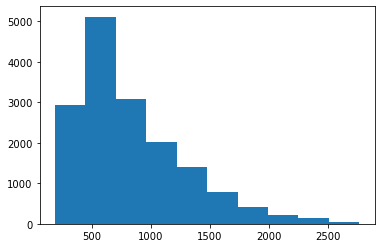

In [35]:
def load_all_reconstructions(path):
    """
    Loads all reconstructions from an overall project path (not the path to the reconstruction files)
    """
    reconstructions_path = path + "reconstruction_files/"
    pcd = o3d.geometry.PointCloud()
    
    for file in os.listdir(reconstructions_path):
        pcd += o3d.io.read_point_cloud(reconstructions_path + file)
        
    return pcd

project_path = "projects/mercedita/"

pcd = load_all_reconstructions(project_path)
_, inliers = pcd.segment_plane(distance_threshold=50,
                                         ransac_n=3,
                                         num_iterations=1000)

pcd_coord = np.asarray(pcd.points)
plt.hist(pcd_coord[inliers, 1].ravel())
plt.show()

**Conclusion:** the distribution of point coordinates is much more reasonable! Might be a good candidate for georeferencing.

Now we will add the GCPs as done in Geoprocessing with Python.

In [42]:
# Origin of our reconstruction, as given by the reference_lla.json (made from the reconstruction)
with open(project_path + "reference_lla.json", "r") as f:
    reference_lla = json.load(f)
    latitude=reference_lla["latitude"]
    longitude=reference_lla["longitude"]
    altitude=reference_lla["altitude"]

# This is the json file that contains the reconstructed feature points
with open(project_path + "reconstruction.json", "r") as f:
    reconstructions = json.load(f)
    
# reading the tracks csv
tracks = pd.read_csv(project_path + "tracks.csv", sep="\t", skiprows=1, names=["image_name", "track_id", "feature_id", "x", "y", "s", "R", "G", "B"])

                                              image_name  track_id  \
0      DSC_0002_5691ee5f-d422-48eb-afb9-f2b70fd0de5c.jpg     14066   
1      DSC_0002_5691ee5f-d422-48eb-afb9-f2b70fd0de5c.jpg     14065   
2      DSC_0002_5691ee5f-d422-48eb-afb9-f2b70fd0de5c.jpg     14063   
3      DSC_0002_5691ee5f-d422-48eb-afb9-f2b70fd0de5c.jpg     14062   
4      DSC_0002_5691ee5f-d422-48eb-afb9-f2b70fd0de5c.jpg     14061   
...                                                  ...       ...   
43669  DSC_0003_43058503-bac4-4655-971b-66374c69d2a7.jpg     10818   
43670  DSC_0003_43058503-bac4-4655-971b-66374c69d2a7.jpg     10819   
43671  DSC_0003_43058503-bac4-4655-971b-66374c69d2a7.jpg     11427   
43672  DSC_0003_43058503-bac4-4655-971b-66374c69d2a7.jpg     10822   
43673  DSC_0003_43058503-bac4-4655-971b-66374c69d2a7.jpg     10823   

       feature_id         x         y         s    R    G    B  
0            4063  0.418229 -0.080547  0.003208  157  182  141  
1            3444 -0.158732  

In [61]:
if not os.path.isdir(project_path + "geotiff/"):
    os.mkdir(project_path + "geotiff/")

# here we put in the actual GCPs
for reconst in reconstructions:
    for shot in reconst["shots"]:
        # some housekeeping
        shot_name = shot.split(".")[0]
        img = cv2.imread(project_path + "images/"+shot)
        shape = img.shape
        
        # get the features from the image and match them with their corresponding reconstructed features
        reconst_ids = list(map(int, reconst["points"].keys()))
        tracks_shot = tracks[(tracks["image_name"] == shot) & (tracks["track_id"].isin(reconst_ids))]
        norm_shot = tracks_shot[["x", "y"]].values
        denorm_shot = denormalized_image_coordinates(norm_shot, shape[1], shape[0])
        reconst_shot = np.array([reconst["points"][str(point)]["coordinates"] for point in tracks_shot["track_id"]])
        
        # filtering out all outliers
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(reconst_shot)
        _, inliers = pcd.segment_plane(distance_threshold=100,
                                         ransac_n=3,
                                         num_iterations=1000)
        denorm_shot = denorm_shot[inliers, :]
        reconst_shot = reconst_shot[inliers, :]
        
        idx = random.sample(range(len(geo_shot)), 20)
        denorm_shot = denorm_shot[idx, :]
        reconst_shot = reconst_shot[idx, :]
        
        # converting all ENU coordinates to lat/lon coordinates
        geo_shot = np.array([enu2geodetic(reconst_shot[i, 0],reconst_shot[i, 1],reconst_shot[i, 2],latitude,longitude,altitude) for i in range(reconst_shot.shape[0])])  
        
        # creating a copy of the jpg as a tif
        orig_fn = project_path + "images/" + shot
        fn = project_path + "geotiff/" + shot_name + ".tif"
        orig_ds = gdal.Open(orig_fn)
        gdal.GetDriverByName('GTiff').CreateCopy(fn, orig_ds)
        
        # updating the geotiff to include the gcps
        ds = gdal.Open(fn, gdal.GA_Update)
        sr = osr.SpatialReference()
        sr.SetWellKnownGeogCS('WGS84')
        
        gcps = [gdal.GCP(geo_shot[i, 1], geo_shot[i, 0], 0, int(denorm_shot[i, 0]), int(denorm_shot[i, 1])) for i in range(geo_shot.shape[0])]
        
        ds.SetGCPs(gcps, sr.ExportToWkt())
        
        ds = None